In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
sns.set()

In [2]:
polinomy = pd.read_csv('traject_3/polinomy/points.csv')
adaptive_0 = pd.read_csv('traject_2/adaptive/points_0.csv')
adaptive_5 = pd.read_csv('traject_2/adaptive/points_5.csv')
adaptive_15 = pd.read_csv('traject_2/adaptive/points_15.csv')
adaptive_20 = pd.read_csv('traject_2/adaptive/points_20.csv')
adaptive_25 = pd.read_csv('traject_2/adaptive/points_25.csv')
adaptive_29 = pd.read_csv('traject_3/adaptive/points_22.csv')
non_adaptive_29 = pd.read_csv('traject_3/non_adaptive/points_29.csv')

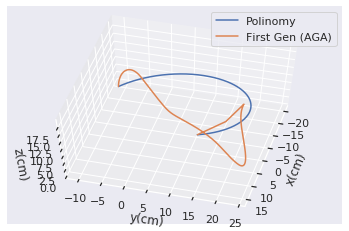

In [357]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(polinomy['x'].values, polinomy['y'].values, polinomy['z'].values, label='Polinomy')
ax.plot(adaptive_0['x'].values, adaptive_0['y'].values, adaptive_0['z'].values, label='First Gen (AGA)')
#ax.plot(first_gen['x'].values, first_gen['y'].values, first_gen['z'].values)
ax.set_xlabel('x(cm)')
ax.set_ylabel('y(cm)')
ax.set_zlabel('z(cm)')
plt.legend(loc='upper right')
ax.view_init(60, 15)
plt.savefig('traj_2_0.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()


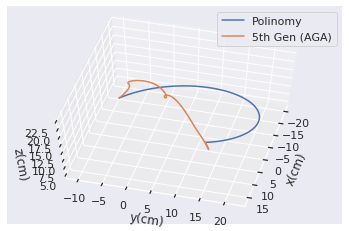

In [358]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(polinomy['x'].values, polinomy['y'].values, polinomy['z'].values, label='Polinomy')
ax.plot(adaptive_5['x'].values, adaptive_5['y'].values, adaptive_5['z'].values, label='5th Gen (AGA)')
#ax.plot(first_gen['x'].values, first_gen['y'].values, first_gen['z'].values)
ax.set_xlabel('x(cm)')
ax.set_ylabel('y(cm)')
ax.set_zlabel('z(cm)')
plt.legend(loc='upper right')
ax.view_init(60, 15)
plt.savefig('traj_2_5.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

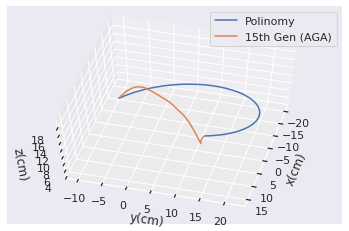

In [359]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(polinomy['x'].values, polinomy['y'].values, polinomy['z'].values, label='Polinomy')
ax.plot(adaptive_15['x'].values, adaptive_15['y'].values, adaptive_15['z'].values, label='15th Gen (AGA)')
#ax.plot(first_gen['x'].values, first_gen['y'].values, first_gen['z'].values)
ax.set_xlabel('x(cm)')
ax.set_ylabel('y(cm)')
ax.set_zlabel('z(cm)')
plt.legend(loc='upper right')
ax.view_init(60, 15)
plt.savefig('traj_2_15.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

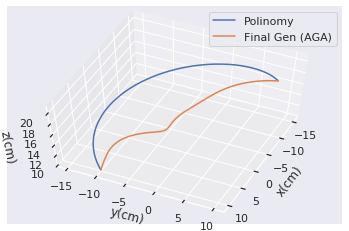

In [376]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(polinomy['x'].values, polinomy['y'].values, polinomy['z'].values, label='Polinomy')
ax.plot(adaptive_29['x'].values, adaptive_29['y'].values, adaptive_29['z'].values, label='Final Gen (AGA)')
#ax.plot(non_adaptive_29['x'].values, non_adaptive_29['y'].values, non_adaptive_29['z'].values, label='Final Gen (GA)')
ax.set_xlabel('x(cm)')
ax.set_ylabel('y(cm)')
ax.set_zlabel('z(cm)')
plt.legend(loc='upper right')
ax.view_init(60, 25)
plt.savefig('traj_3_29.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

In [84]:
fit1_test1 = pd.DataFrame()
fit1_test2 = pd.DataFrame()
fit1_test3 = pd.DataFrame()
fit1_test4 = pd.DataFrame()
fit1_test5 = pd.DataFrame()
fit1_test6 = pd.DataFrame()
fit1_test7 = pd.DataFrame()


fit1_test1['distance'] = [83.99, 83.99, 83.99,83.99, 83.99, 83.99,83.99, 83.99, 83.99,83.99, 83.99, 83.99,83.99, 83.99, 83.99,83.99, 83.99, 83.99,83.99, 83.99, 83.99,83.99, 83.99, 83.99,83.99, 83.99, 83.99,83.99, 83.99, 83.99]
fit1_test1['generation'] = np.linspace(1,30,30)
fit1_test1['Method'] = 'Polynomial'

fit1_test2['distance'] = [85.56045669545868, 85.56045669545868, 79.8899037168801, 68.27625115851313, 66.33340682291657, 66.33340682291657, 66.33340682291657, 66.33340682291657, 61.2679007063424, 61.2679007063424, 61.2679007063424, 61.2679007063424, 61.222530092891056, 61.222530092891056, 61.222530092891056, 61.222530092891056, 61.222530092891056, 59.49350354163063, 59.49350354163063, 59.49350354163063, 59.49350354163063, 59.49350354163063, 59.49350354163063, 59.49350354163063, 59.49350354163063, 59.49350354163063, 59.49350354163063, 59.49350354163063, 59.49350354163063, 59.49350354163063]
fit1_test2['generation'] = np.linspace(1,30,30)
fit1_test2['Method'] = 'AGA'

fit1_test3['distance'] = [88.79680239685133, 80.85119446900259, 80.65944425366233, 75.78551173990627, 70.77537067280603, 64.4868302707337, 64.4868302707337, 64.4868302707337, 64.42619023381927, 64.42619023381927, 59.99497997466592, 59.99497997466592, 59.99497997466592, 59.99497997466592, 59.99497997466592, 59.99497997466592, 59.99497997466592, 59.99497997466592, 59.99497997466592, 59.99497997466592, 59.36568658468264, 59.36568658468264, 59.36568658468264, 59.36568658468264, 59.36568658468264, 58.92115991956183, 58.92115991956183, 58.92115991956183, 58.92115991956183, 58.92115991956183 ]
fit1_test3['generation'] = np.linspace(1,30,30)
fit1_test3['Method'] = 'AGA'

fit1_test4['distance'] = [96.7213120447753, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727, 84.24064161328727]
fit1_test4['generation'] = np.linspace(1,30,30)
fit1_test4['Method'] = 'GA'

fit1_test5['distance'] = [74.64219646594391, 74.64219646594391, 74.64219646594391, 74.64219646594391, 74.64219646594391, 74.09568455127663, 74.02393727966786, 73.3818366161385, 73.3818366161385, 71.15462652374289, 71.15462652374289, 71.15462652374289, 71.15462652374289, 71.15462652374289, 67.60933388844408, 67.60933388844408, 61.84323372341706, 61.84323372341706, 61.84323372341706, 60.656018642201175, 57.3916343433504, 57.3916343433504, 57.3916343433504, 57.3916343433504, 57.3916343433504, 57.3916343433504, 57.30814553158005, 56.40720563879782, 56.40720563879782, 56.40720563879782]
fit1_test5['generation'] = np.linspace(1,30,30)
fit1_test5['Method'] = 'AGA'

fit1_test6['distance'] = [118.60931291967559, 104.0629535673517, 104.0629535673517, 84.44428520496369, 84.44428520496369, 80.25185762353739, 80.25185762353739, 78.49275920360199, 78.49275920360199, 78.49275920360199, 77.61060367873984, 77.61060367873984, 75.99579795193103, 75.79579795193103, 75.77891337655002, 75.77465774220938, 75.436011213588166, 75.436011213588166, 75.414951727801075, 75.414951727801075, 75.414951727801075, 75.414951727801075, 75.414951727801075, 75.414951727801075, 75.414951727801075, 75.414951727801075, 75.414951727801075, 75.414951727801075, 75.065308741209776, 75.065308741209776]
fit1_test6['generation'] = np.linspace(1,30,30)
fit1_test6['Method'] = 'GA'

fit1_test7['distance'] = [96.18029422963414, 88.93927804214911, 85.7523054187292, 85.7523054187292, 85.7523054187292, 84.50865720958757, 84.50865720958757, 84.50865720958757, 84.50865720958757, 84.03038299371718, 82.89841164609919, 82.89841164609919, 82.89841164609919, 82.89841164609919, 79.64276567380466, 79.64276567380466, 79.64276567380466, 79.64276567380466, 79.64276567380466, 79.64276567380466, 79.64276567380466, 79.64276567380466,79.64276567380466, 79.64276567380466, 79.64276567380466, 77.73936887821013, 77.73936887821013, 77.07878165689431, 75.60238395759397, 75.60238395759397]
fit1_test7['generation'] = np.linspace(1,30,30)
fit1_test7['Method'] = 'GA'


fit1 = pd.concat([fit1_test1, fit1_test2, fit1_test3, fit1_test4, fit1_test5, fit1_test6, fit1_test7])



[Text(0, 0.5, 'Distance - cm'), Text(0.5, 0, 'Generation')]

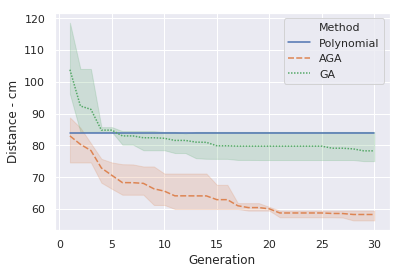

In [85]:
#test = sns.relplot(x="generation", y="distance", kind="line", data=plot_data)
sns.set(style="darkgrid")
ax = sns.lineplot(x="generation", y="distance", hue='Method', style="Method", data=fit1)
ax.set(xlabel='Generation', ylabel='Distance - cm')
#ax.set(ylim=(0,110))
#ax.set(xlim=(1,30))

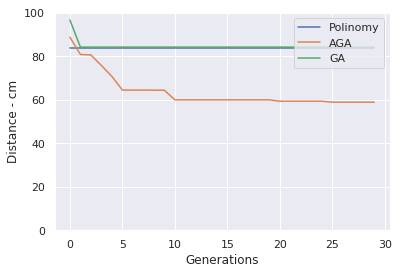

In [383]:
plt.plot(polinomy_fit[0:30], label='Polinomy')
plt.plot(adaptive_fit, label='AGA')
plt.plot(non_adaptive_fit, label='GA')
#plt.plot(distance_non_adaptive[0:100], label = 'GA')
#plt.plot(polinomy[0:100], label = 'Polinomy')
plt.xlabel('Generations')
plt.ylabel('Distance - cm')
plt.ylim(0,100)
plt.legend(loc='upper right')
plt.savefig('fitness.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

In [327]:
joints_polinomy = pd.read_csv('traject_1/polinomy/angles.csv')
joints_adaptive_0 = pd.read_csv('traject_1/adaptive/angles_0.csv')
joints_adaptive_10 = pd.read_csv('traject_1/adaptive/angles_10.csv')
joints_adaptive_15 = pd.read_csv('traject_1/adaptive/angles_15.csv')
joints_adaptive_20 = pd.read_csv('traject_1/adaptive/angles_20.csv')
joints_adaptive_25 = pd.read_csv('traject_1/adaptive/angles_25.csv')
joints_adaptive_29 = pd.read_csv('traject_1/adaptive/angles_29.csv')
joints_non_adaptive_29 = pd.read_csv('traject_1/non_adaptive/angles_29.csv')

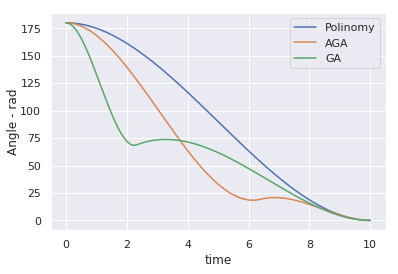

In [329]:
joints_polinomy.head()
t = np.linspace(0,10,500)
plt.plot(t, 180*joints_polinomy['theta1']/np.pi, label = 'Polinomy')
plt.plot(t, 180*joints_adaptive_29['theta1']/np.pi, label = 'AGA')
plt.plot(t, 180*joints_non_adaptive_29['theta1']/np.pi, label = 'GA')
plt.xlabel('time')
plt.ylabel('Angle - rad', labelpad=0)
plt.legend(loc='upper right')
plt.savefig('theta_1.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

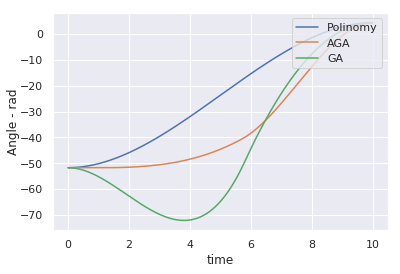

In [330]:
joints_polinomy.head()
t = np.linspace(0,10,500)
plt.plot(t, 180*joints_polinomy['theta2']/np.pi, label = 'Polinomy')
plt.plot(t, 180*joints_adaptive_29['theta2']/np.pi, label = 'AGA')
plt.plot(t, 180*joints_non_adaptive_29['theta2']/np.pi, label = 'GA')
plt.xlabel('time')
plt.ylabel('Angle - rad', labelpad=0)
plt.legend(loc='upper right')
plt.savefig('theta_2.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

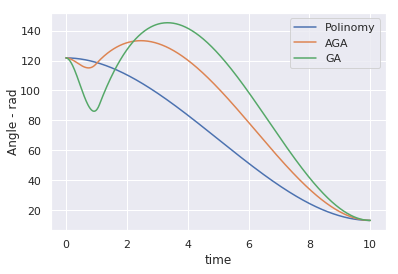

In [331]:
joints_polinomy.head()
t = np.linspace(0,10,500)
plt.plot(t, 180*joints_polinomy['theta3']/np.pi, label = 'Polinomy')
plt.plot(t, 180*joints_adaptive_29['theta3']/np.pi, label = 'AGA')
plt.plot(t, 180*joints_non_adaptive_29['theta3']/np.pi, label = 'GA')
plt.xlabel('time')
plt.ylabel('Angle - rad', labelpad=0)
plt.legend(loc='upper right')
plt.savefig('theta_3.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

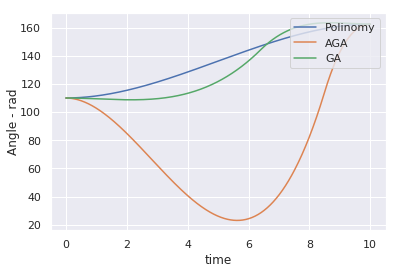

In [332]:
joints_polinomy.head()
t = np.linspace(0,10,500)
plt.plot(t, 180*joints_polinomy['theta4']/np.pi, label = 'Polinomy')
plt.plot(t, 180*joints_adaptive_29['theta4']/np.pi, label = 'AGA')
plt.plot(t, 180*joints_non_adaptive_29['theta4']/np.pi, label = 'GA')
plt.xlabel('time')
plt.ylabel('Angle - rad', labelpad=0)
plt.legend(loc='upper right')
plt.savefig('theta_4.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

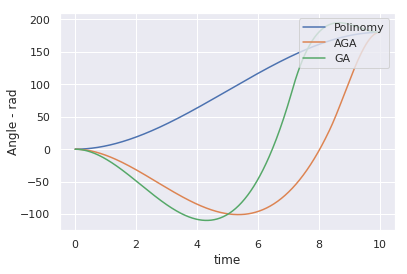

In [333]:
joints_polinomy.head()
t = np.linspace(0,10,500)
plt.plot(t, 180*joints_polinomy['theta5']/np.pi, label = 'Polinomy')
plt.plot(t, 180*joints_adaptive_29['theta5']/np.pi, label = 'AGA')
plt.plot(t, 180*joints_non_adaptive_29['theta5']/np.pi, label = 'GA')
plt.xlabel('time')
plt.ylabel('Angle - rad', labelpad=0)
plt.legend(loc='upper right')
plt.savefig('theta_5.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

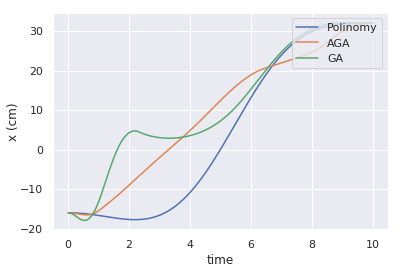

In [342]:
joints_polinomy.head()
t = np.linspace(0,10,500)

plt.plot(t, polinomy['x'].values, label = 'Polinomy')
plt.plot(t, adaptive_29['x'].values, label = 'AGA')
plt.plot(t, non_adaptive_29['x'].values, label = 'GA')
plt.xlabel('time')
plt.ylabel('x (cm)', labelpad=0)
plt.legend(loc='upper right')

plt.savefig('x.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

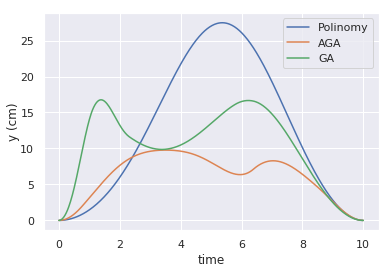

In [343]:
joints_polinomy.head()
t = np.linspace(0,10,500)

plt.plot(t, polinomy['y'].values, label = 'Polinomy')
plt.plot(t, adaptive_29['y'].values, label = 'AGA')
plt.plot(t, non_adaptive_29['y'].values, label = 'GA')
plt.xlabel('time')
plt.ylabel('y (cm)', labelpad=0)
plt.legend(loc='upper right')
plt.savefig('y.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

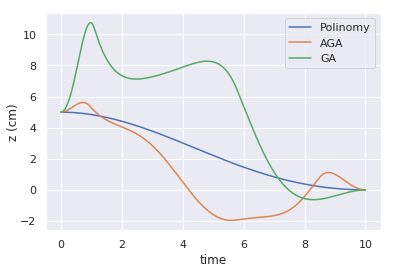

In [344]:
joints_polinomy.head()
t = np.linspace(0,10,500)

plt.plot(t, polinomy['z'].values, label = 'Polinomy')
plt.plot(t, adaptive_29['z'].values, label = 'AGA')
plt.plot(t, non_adaptive_29['z'].values, label = 'GA')
plt.xlabel('time')
plt.ylabel('z (cm)', labelpad=0)
plt.legend(loc='upper right')
plt.savefig('z.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

In [283]:

def integration(points):
    dist = 0 
    for i in range(points.shape[0]-1):
        dist+=np.sqrt((points[i][0] - points[i+1][0])**2 + (points[i][1] - points[i+1][1])**2 + (points[i][2] - points[i+1][2])**2)
    return dist


In [284]:
points = [first_gen['x'], first_gen['y'], first_gen['z']]
points = np.transpose(np.array(points))
points

array([[-1.60000000e+01,  1.43669089e-09,  5.00000000e+00],
       [-1.60203668e+01,  2.76306697e-03,  5.01304534e+00],
       [-1.60793361e+01,  1.10542046e-02,  5.05124434e+00],
       ...,
       [ 3.19978750e+01,  6.38113944e-03,  3.46286861e-04],
       [ 3.19994663e+01,  1.59948813e-03,  8.65205153e-05],
       [ 3.20000000e+01, -2.27006281e-13,  4.26325641e-14]])

In [285]:
integration(points)

80.85119446900259

In [5]:
fit1_test1 = pd.DataFrame()
fit1_test2 = pd.DataFrame()
fit1_test3 = pd.DataFrame()
fit1_test4 = pd.DataFrame()
fit1_test5 = pd.DataFrame()
fit1_test6 = pd.DataFrame()
fit1_test7 = pd.DataFrame()
fit1_test8 = pd.DataFrame()
fit1_test9 = pd.DataFrame()
fit1_test10 = pd.DataFrame()
fit1_test11 = pd.DataFrame()
fit1_test12 = pd.DataFrame()
fit1_test13 = pd.DataFrame()
fit1_test14 = pd.DataFrame()


fit1_test1['distance'] = [63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785,63.5971499408785]
fit1_test1['generation'] = np.linspace(1,30,30)
fit1_test1['Method'] = 'Polynomial'

fit1_test2['distance'] = [79.40255113494206, 79.40255113494206, 64.4949161619419, 64.4949161619419, 61.09656319006134, 58.95188415998675, 58.95188415998675, 58.95188415998675, 56.15230811995807, 56.15230811995807, 55.39025273681605, 54.11823664409832, 54.11823664409832, 53.99656204591214, 53.801262327113804, 53.801262327113804, 53.801262327113804, 53.801262327113804, 53.801262327113804, 52.86329312846974, 52.86329312846974, 52.833842999093854, 52.833842999093854, 52.833842999093854, 51.61883494698449, 51.61883494698449, 51.20706001612079, 51.20706001612079, 51.20706001612079, 51.20706001612079]
fit1_test2['generation'] = np.linspace(1,30,30)
fit1_test2['Method'] = 'AGA'

fit1_test3['distance'] = [63.19151506517166, 63.19151506517166, 60.080490264177236, 59.35999951737445, 57.46456605519683, 57.46456605519683, 57.46456605519683, 57.46456605519683, 56.733768500544905, 55.22188556080396, 50.18692044331887, 50.18692044331887, 49.92579060838959, 49.92579060838959, 49.92579060838959, 49.92579060838959, 48.84711099806925, 48.84711099806925, 48.84711099806925, 48.84711099806925, 48.84711099806925, 48.84711099806925, 47.24013323272575, 47.24013323272575, 47.24013323272575, 47.24013323272575, 47.24013323272575, 47.24013323272575, 47.24013323272575, 47.24013323272575]
fit1_test3['generation'] = np.linspace(1,30,30)
fit1_test3['Method'] = 'AGA'

fit1_test4['distance'] = [66.76942345744587, 66.76942345744587, 57.52232975199361, 57.52232975199361, 57.52232975199361, 57.52232975199361, 57.52232975199361, 56.90312925933446, 56.90312925933446, 56.90312925933446, 56.90312925933446, 56.90312925933446, 55.92561497108247, 55.92561497108247, 52.05377344755628, 52.05377344755628, 52.05377344755628, 52.05377344755628, 52.05377344755628, 52.05377344755628, 52.05377344755628, 52.05377344755628, 52.05377344755628, 52.05377344755628, 52.05377344755628, 52.05377344755628, 51.99488460063254, 51.99488460063254, 51.99488460063254, 51.99488460063254]
fit1_test4['generation'] = np.linspace(1,30,30)
fit1_test4['Method'] = 'AGA'

fit1_test5['distance'] = [65.71512481583818, 65.71512481583818, 65.71512481583818, 60.29548157465955, 60.29548157465955, 58.36596153335417, 58.36596153335417, 57.10901917837734, 57.10901917837734, 55.35875526744862, 55.35875526744862, 55.35875526744862, 55.35875526744862, 55.35875526744862, 55.151679444108616, 55.151679444108616, 55.151679444108616, 55.151679444108616, 55.127852246255095, 55.127852246255095, 54.4704007461384, 54.4704007461384, 54.4704007461384, 54.4704007461384, 54.4704007461384, 54.4704007461384, 54.4704007461384, 54.4704007461384, 54.328484490613775, 54.328484490613775]
fit1_test5['generation'] = np.linspace(1,30,30)
fit1_test5['Method'] = 'AGA'

fit1_test6['distance'] = [71.73620459476746, 65.92250871708895, 65.92250871708895, 62.27766958608904, 62.27766958608904, 62.27766958608904, 62.27766958608904, 57.907910775254486, 57.907910775254486, 57.907910775254486, 57.907910775254486, 57.907910775254486, 56.83040011802697, 56.83040011802697, 56.83040011802697, 56.83040011802697, 56.83040011802697, 56.83040011802697, 54.172885311768894, 54.172885311768894, 54.172885311768894, 54.172885311768894, 53.52025042901315, 53.52025042901315, 53.52025042901315, 51.075384113376195, 51.075384113376195, 51.075384113376195, 51.075384113376195, 51.075384113376195]
fit1_test6['generation'] = np.linspace(1,30,30)
fit1_test6['Method'] = 'AGA'


fit1_test7['distance'] = [72.01004206166728, 58.657149446521295, 58.657149446521295, 58.657149446521295, 58.657149446521295, 56.551162593262895, 56.551162593262895, 56.551162593262895, 56.551162593262895, 56.551162593262895, 56.551162593262895, 56.551162593262895, 54.17372888001946, 54.17372888001946, 54.17372888001946, 54.17372888001946, 54.17372888001946, 54.115192699866455, 53.93446666085521, 53.93446666085521, 53.43386528744971, 53.43386528744971, 53.34715364300318, 53.34715364300318, 53.34715364300318, 53.34715364300318, 53.34715364300318, 53.34715364300318, 53.34715364300318, 53.34715364300318]
fit1_test7['generation'] = np.linspace(1,30,30)
fit1_test7['Method'] = 'AGA'


fit1 = pd.concat([fit1_test1, fit1_test2, fit1_test4, fit1_test5, fit1_test6, fit1_test7])


[Text(0, 0.5, 'Distance - cm'), Text(0.5, 0, 'Generation')]

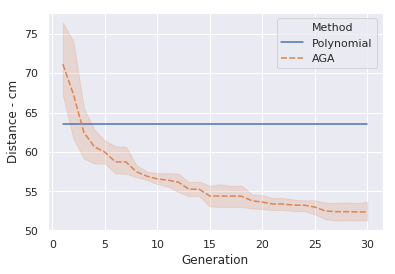

In [6]:
#test = sns.relplot(x="generation", y="distance", kind="line", data=plot_data)
sns.set(style="darkgrid")
ax = sns.lineplot(x="generation", y="distance", hue='Method', style="Method", data=fit1)
ax.set(xlabel='Generation', ylabel='Distance - cm')
#ax.set(ylim=(0,110))
#ax.set(xlim=(1,30))

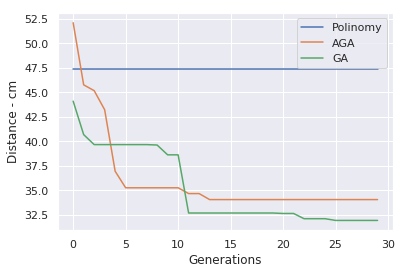

In [87]:
polinomy_3 = [47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334]
adaptive_fit3 = [52.10145531897578, 45.758750712181886, 45.16894809207263, 43.219407404650624, 36.93785013792726, 35.249739342941716, 35.249739342941716, 35.249739342941716, 35.249739342941716, 35.249739342941716, 35.249739342941716, 34.657432748762915, 34.657432748762915, 34.04454691459989, 34.04454691459989, 34.04454691459989, 34.04454691459989, 34.04454691459989, 34.04454691459989, 34.04454691459989, 34.04454691459989, 34.04454691459989, 34.04454691459989, 34.04454691459989, 34.04454691459989, 34.04454691459989, 34.04454691459989, 34.04454691459989, 34.04454691459989, 34.04454691459989]
non_adaptive_fit3 = [44.0928753097056, 40.67893583620781, 39.65831124939728, 39.65831124939728, 39.65831124939728, 39.65831124939728, 39.65831124939728, 39.65831124939728, 39.615383123716484, 38.61347926991727, 38.61347926991727, 32.6732284815691, 32.6732284815691, 32.6732284815691, 32.6732284815691, 32.6732284815691, 32.6732284815691, 32.6732284815691, 32.6732284815691, 32.6732284815691, 32.62605409747232, 32.62605409747232, 32.09231346833291, 32.09231346833291, 32.09231346833291, 31.916915971485107, 31.916915971485107, 31.916915971485107, 31.916915971485107, 31.916915971485107]

plt.plot(polinomy_3[0:30], label='Polinomy')
plt.plot(adaptive_fit3, label='AGA')
plt.plot(non_adaptive_fit3, label='GA')
#plt.plot(distance_non_adaptive[0:100], label = 'GA')
#plt.plot(polinomy[0:100], label = 'Polinomy')
plt.xlabel('Generations')
plt.ylabel('Distance - cm')
plt.legend(loc='upper right')
plt.savefig('fitness3.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()